<a href="https://colab.research.google.com/github/Vishnukvsvk/ML-Using-Python-IBM/blob/master/Density_Based_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Info about Scalers**

MinMaxScaler(feature_range = (0, 1)) will transform each value in the column proportionally within the range [0,1]. Use this as the first scaler choice to transform a feature, as it will preserve the shape of the dataset (no distortion).

StandardScaler() will transform each value in the column to range about the mean 0 and standard deviation 1, ie, each value will be normalised by subtracting the mean and dividing by standard deviation. Use StandardScaler if you know the data distribution is normal.

If there are outliers, use RobustScaler(). Alternatively you could remove the outliers and use either of the above 2 scalers (choice depends on whether data is normally distributed)

In [3]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


**Data Generation**

In [0]:
def createDataPoints(centroidLocation,no_of_samples,clusterDeviation):
  X,y = make_blobs(n_samples=no_of_samples,centers=centroidLocation,cluster_std=clusterDeviation)
  
  X = StandardScaler().fit_transform(X)

  return X,y

In [0]:
X,y = createDataPoints([[4,3], [2,-1], [-1,4]] , 1500, 0.5)

**Modelling**

In [6]:
#DBSCAN consists of two parameters
#eps = radius(epsilon)
#min_samples = minimum no of samples

epsilon = 0.3
num_samples =7
db = DBSCAN(eps=epsilon,min_samples=num_samples).fit(X)
labels=db.labels_
labels

array([0, 1, 1, ..., 0, 1, 0])

In [9]:
len(labels)

1500

In [15]:
set(labels)

{-1, 0, 1, 2}

**Distinguishing ouliers**

In [12]:
core_samples_mask = np.zeros_like(db.labels_,dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
core_samples_mask

array([ True,  True,  True, ...,  True,  True,  True])

In [16]:
#No of clusters in labels, ignoring noise if present(-1)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

3

In [17]:
# Remove repetition in labels by turning it into a set.
unique_labels = set(labels)
unique_labels

{-1, 0, 1, 2}

**Data visualization**

In [18]:
colors = plt.cm.Spectral(np.linspace(0,1,len(unique_labels)))
colors

array([[0.61960784, 0.00392157, 0.25882353, 1.        ],
       [0.99346405, 0.74771242, 0.43529412, 1.        ],
       [0.74771242, 0.89803922, 0.62745098, 1.        ],
       [0.36862745, 0.30980392, 0.63529412, 1.        ]])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

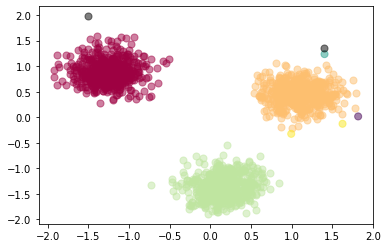

In [23]:
#plot points with colors
for k,col in zip(unique_labels,colors):
  if k==-1:
    col='k' #for noise
  
  class_member_mask = (labels==k)
  # Plot the datapoints that are clustered
  xy = X[class_member_mask & core_samples_mask]
  plt.scatter(xy[:, 0], xy[:, 1],s=50, c=col, marker=u'o', alpha=0.5)

  # Plot the outliers
  xy = X[class_member_mask & ~core_samples_mask]
  plt.scatter(xy[:, 0], xy[:, 1],s=50, c=col, marker=u'o', alpha=0.5)

#**Using K-Means Clustering**

**For k = 3**

In [24]:
X[0:5]

array([[-1.28212648,  0.89800823],
       [ 0.68175707,  0.57169063],
       [ 1.45496813,  0.7707382 ],
       [-1.51234703,  0.89035805],
       [ 1.14753465,  0.13689053]])

In [25]:
y[0:5]

array([2, 0, 0, 2, 0])

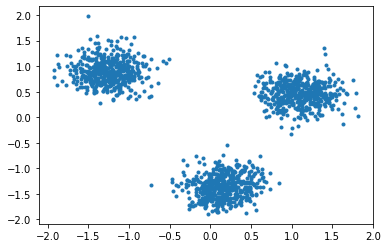

In [27]:
plt.scatter(X[:,0],X[:,1],marker='.')

In [0]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3,init='k-means++',n_init=12)

In [39]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=12, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [40]:
k_means_labels = kmeans.labels_
k_means_labels

array([0, 1, 1, ..., 0, 1, 0], dtype=int32)

In [41]:
kmeans_cluster_centers = kmeans.cluster_centers_
kmeans_cluster_centers

array([[-1.25944683,  0.89719718],
       [ 1.10528532,  0.454127  ],
       [ 0.15416152, -1.35132418]])

**Visual plot**

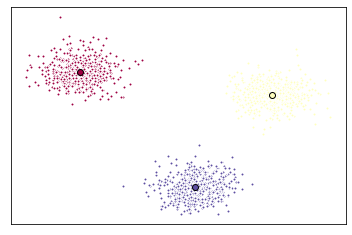

In [42]:
fig = plt.figure(figsize=(6,4))

colors = plt.cm.Spectral(np.linspace(0,1,len(set(k_means_labels))))

#Creating plot
ax = fig.add_subplot(1,1,1)

for k,col in zip(range(len(kmeans_cluster_centers)),colors):

  my_members = (k_means_labels==k)
  cluster_center = kmeans_cluster_centers[k]

  #Plot data points using color col
  ax.plot(X[my_members,0],X[my_members,1],'w',markerfacecolor=col,marker='.')

  # Plots the centroids with specified color, but with a darker outline
  ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)


ax.set_xticks(())
ax.set_yticks(())

plt.show()

**For 4 clusters**

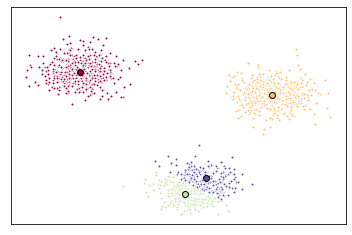

In [43]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4,init='k-means++',n_init=12)
kmeans.fit(X)
k_means_labels = kmeans.labels_
kmeans_cluster_centers = kmeans.cluster_centers_

fig = plt.figure(figsize=(6,4))

colors = plt.cm.Spectral(np.linspace(0,1,len(set(k_means_labels))))

#Creating plot
ax = fig.add_subplot(1,1,1)

for k,col in zip(range(len(kmeans_cluster_centers)),colors):

  my_members = (k_means_labels==k)
  cluster_center = kmeans_cluster_centers[k]

  #Plot data points using color col
  ax.plot(X[my_members,0],X[my_members,1],'w',markerfacecolor=col,marker='.')

  # Plots the centroids with specified color, but with a darker outline
  ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)


ax.set_xticks(())
ax.set_yticks(())

plt.show()


#**Weather Station Clustering using DBSCAN & scikit-learn**

In [44]:
!wget -O weather-stations20140101-20141231.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/weather-stations20140101-20141231.csv

--2020-05-11 10:25:03--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/weather-stations20140101-20141231.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 129821 (127K) [text/csv]
Saving to: ‘weather-stations20140101-20141231.csv’

weather-stations201 100%[===================>] 126.78K  --.-KB/s    in 0.05s   

2020-05-11 10:25:04 (2.59 MB/s) - ‘weather-stations20140101-20141231.csv’ saved [129821/129821]



In [45]:
import pandas as pd

df = pd.read_csv('weather-stations20140101-20141231.csv')
df.head()

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,DwTn,S,DwS,S%N,P,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,0.0,0.0,0.0,NaN,178.8,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,0.0,0.0,0.0,0.0,258.6,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,9.0,0.0,9.0,NaN,264.6,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055
3,DISCOVERY ISLAND,48.425,-123.226,BC,NaN,NaN,NaN,12.5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1012475
4,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,-1.0,2.0,0.0,2.0,NaN,168.4,2.0,NaN,NaN,11.0,NaN,NaN,NaN,267.7,0.0,1012573


In [46]:
df.columns

Index(['Stn_Name', 'Lat', 'Long', 'Prov', 'Tm', 'DwTm', 'D', 'Tx', 'DwTx',
       'Tn', 'DwTn', 'S', 'DwS', 'S%N', 'P', 'DwP', 'P%N', 'S_G', 'Pd', 'BS',
       'DwBS', 'BS%', 'HDD', 'CDD', 'Stn_No'],
      dtype='object')

In [52]:
from sklearn.cluster import DBSCAN
df.shape

(1341, 25)

**Cleaning Data**

In [61]:
df = df[pd.notnull(df['Tm'])]
df = df.reset_index(drop=True)
df.head()

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,DwTn,S,DwS,S%N,P,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,0.0,0.0,0.0,NaN,178.8,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,0.0,0.0,0.0,0.0,258.6,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,9.0,0.0,9.0,NaN,264.6,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055
3,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,-1.0,2.0,0.0,2.0,NaN,168.4,2.0,NaN,NaN,11.0,NaN,NaN,NaN,267.7,0.0,1012573
4,ESQUIMALT HARBOUR,48.432,-123.439,BC,8.8,0.0,NaN,13.1,0.0,1.9,0.0,NaN,NaN,NaN,81.0,8.0,NaN,NaN,12.0,NaN,NaN,NaN,258.6,0.0,1012710
